# **Appliance Energy Prediction**

In [2]:
# Download this library if you dont have
!pip install chart-studio
!pip install missingpy
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 6.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=f4f56f60429f5b5fb84be474608600c8539d0eae305611742bf4a4d450f0fb0b
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [3]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Set Seed to keep results consistant
np.random.seed(200)

# **Reading the data**

In [5]:
data =pd.read_csv("energydata_complete.csv",parse_dates=['date'])

In [6]:
# Checking the top 10 rows loaded data
data.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [7]:
# We will check for all the columns and its data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

# **Data Exploration**

In [8]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
print('Row:' , data.shape[0])
print('Columns:' , data.shape[1])

Row: 19735
Columns: 29


In [10]:
#Number of null values in all columns
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

# **Data Visualisation**

In [13]:
# Creating a new dataframe for Visualisation and not touch the main data
df_energy = data

In [14]:
#setting the date index
df_energy = df_energy.set_index('date')

In [15]:
df_energy['month'] = df_energy.index.month
df_energy['weekday'] = df_energy.index.weekday
df_energy['hour'] = df_energy.index.hour
df_energy['week'] = df_energy.index.week

In [16]:
# Function to be used from the plot 


def daily(x,df=df_energy):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df_energy):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df_energy):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

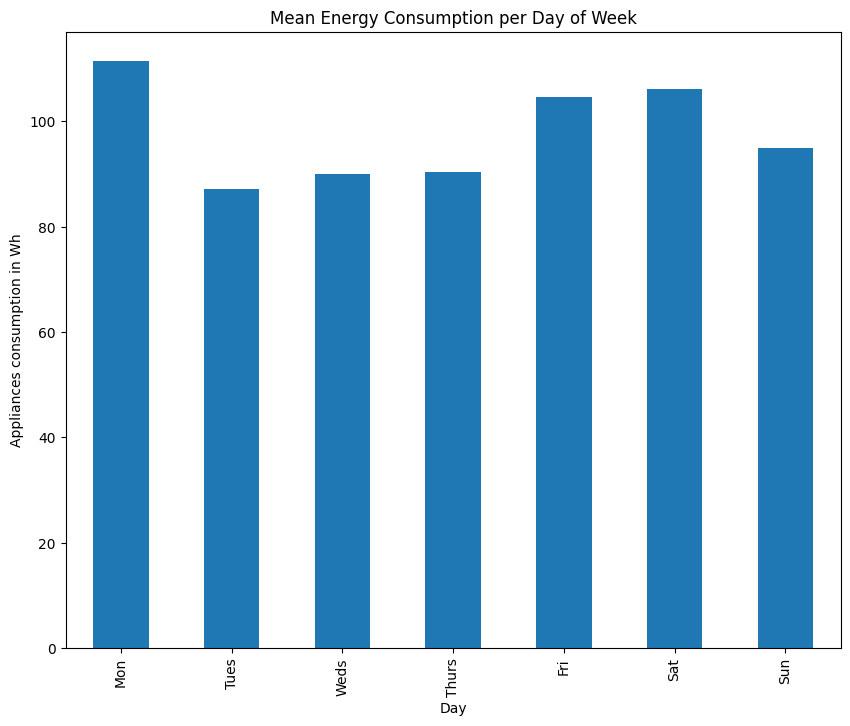

In [17]:
# Plot of Mean Energy Consumption per Day of Week

daily('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

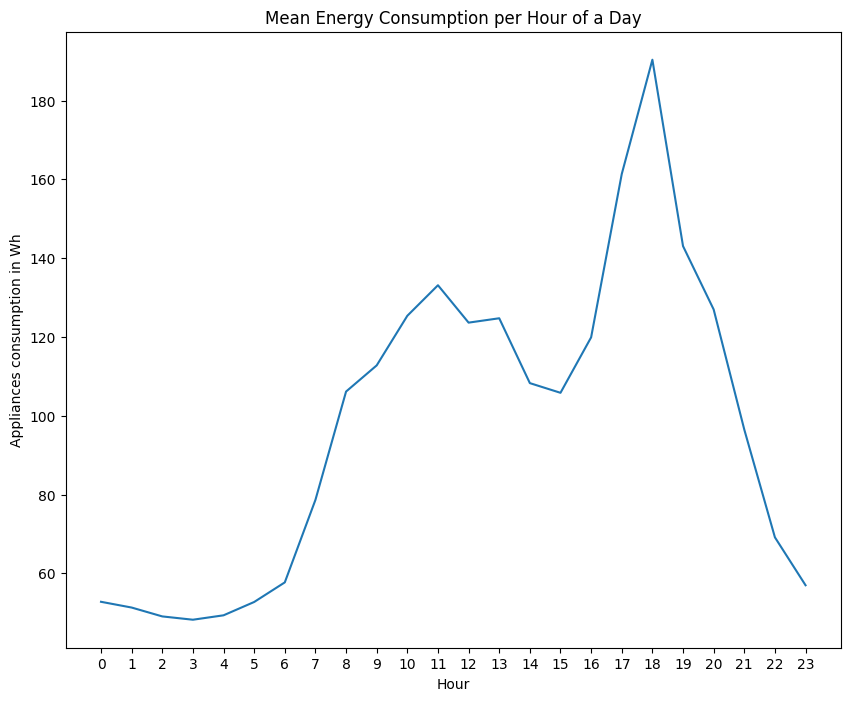

In [18]:
# Plot of Mean Energy Consumption per Hour of a Day

hourly('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

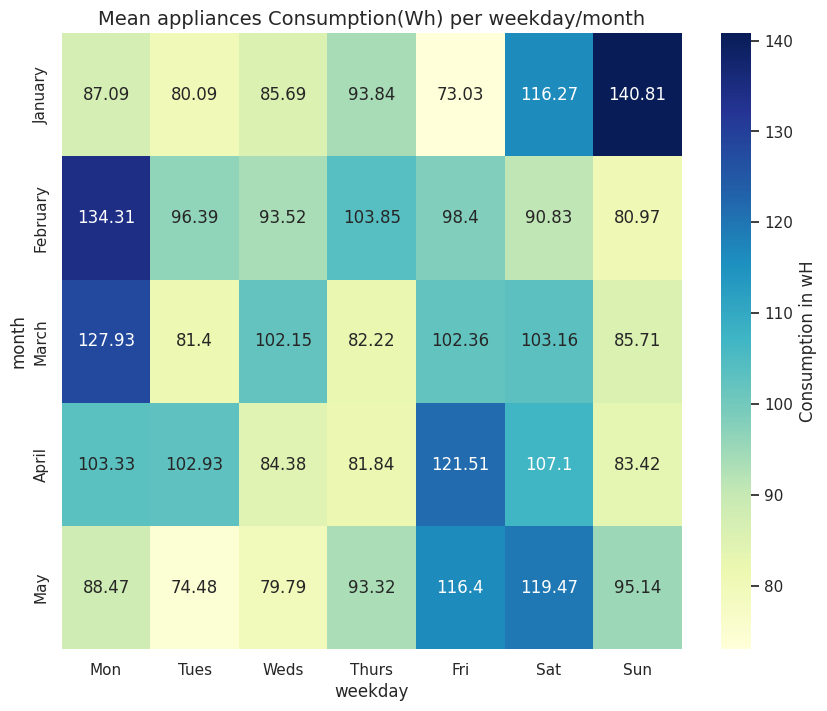

In [19]:
# Heatmap: Mean consumption per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Appliances').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

In [20]:
# Outliers removal
energy_a = df_energy.drop(df_energy[(df_energy.Appliances>790)|(df_energy.Appliances<0)].index)
energy_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [21]:
energy_a=energy_a.drop("month",axis=1)
energy_a=energy_a.drop("weekday",axis=1)
energy_a=energy_a.drop("week",axis=1)

In [22]:
energy_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

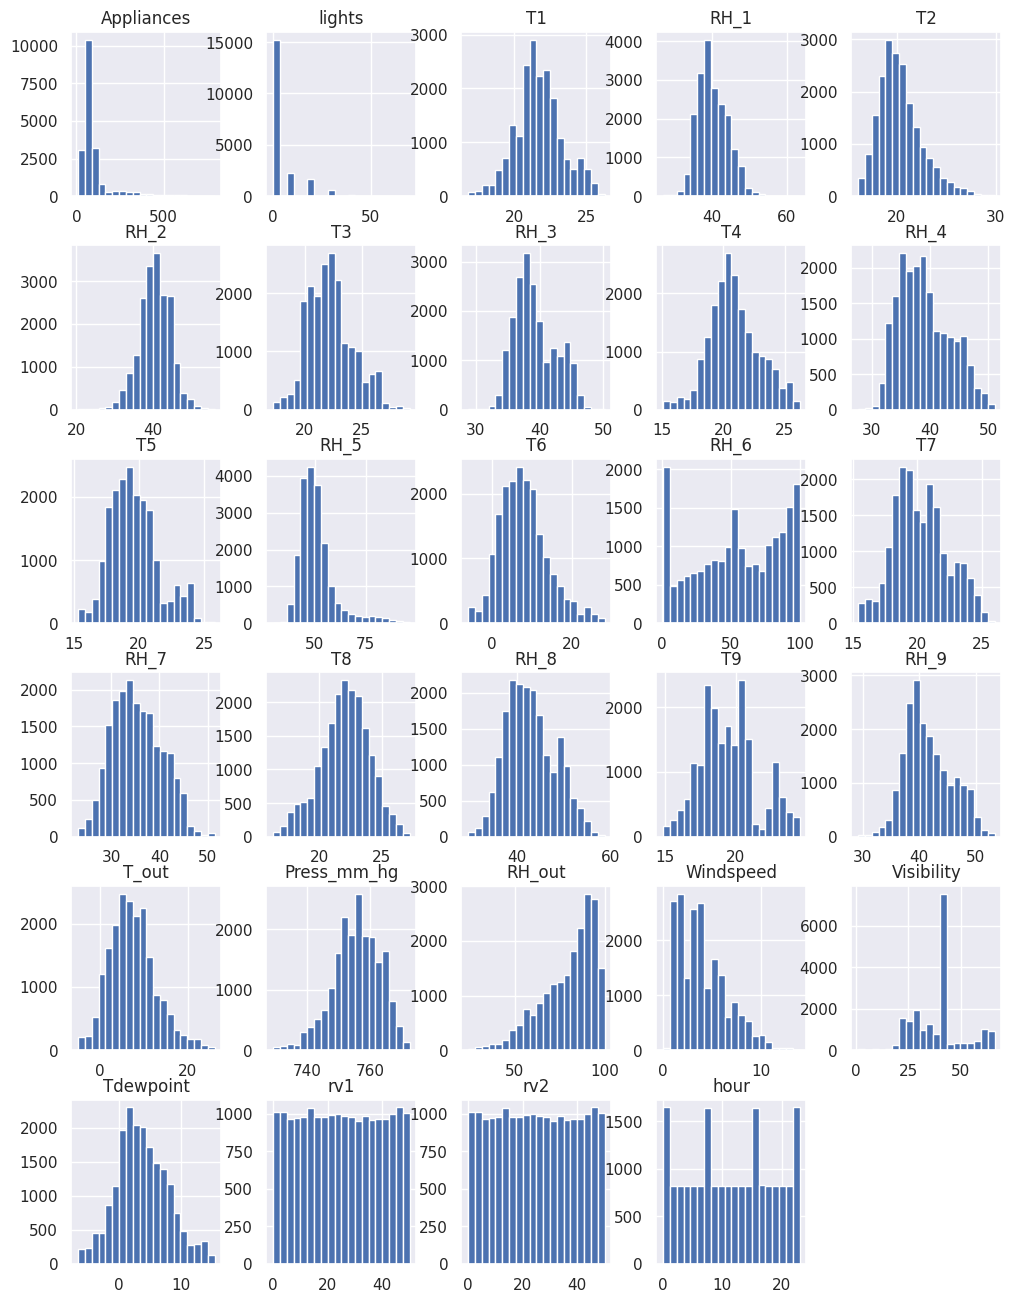

In [23]:
# Histogram of all the features to understand the distribution
energy_a.hist(bins = 20 , figsize= (12,16)) ;

In [24]:
energy_a['log_appliances'] = np.log(energy_a.Appliances) 

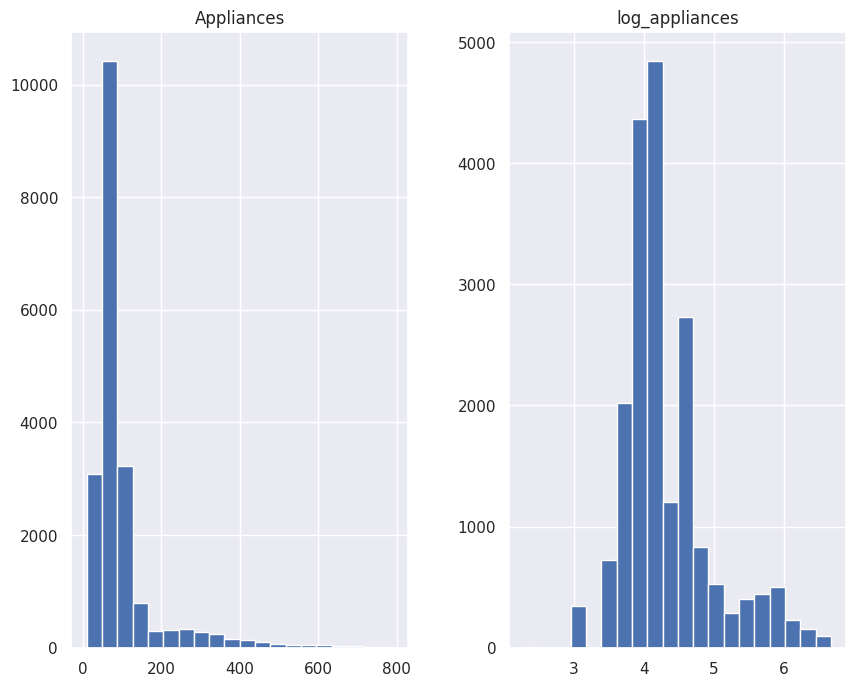

In [25]:
appliance = ["Appliances","log_appliances"]
appliance=energy_a[appliance]
appliance.hist(bins = 20 ) ;

In [26]:
# finding correlatin matrix of all the attributes
energy_a.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,log_appliances
Appliances,1.000000,0.198201,0.058996,0.087890,0.122590,-0.058680,0.088211,0.037644,0.043280,0.017365,...,0.102671,-0.039059,-0.155689,0.090528,-0.004157,0.017180,-0.012404,-0.012404,0.219468,0.904056
lights,0.198201,1.000000,-0.022727,0.107266,-0.004990,0.051428,-0.096397,0.131253,-0.008049,0.115113,...,-0.073683,-0.011491,0.068215,0.060741,0.019347,-0.035632,0.000627,0.000627,0.255219,0.261356
T1,0.058996,-0.022727,1.000000,0.163976,0.836827,-0.002565,0.892423,-0.028357,0.876984,0.098001,...,0.682862,-0.149993,-0.345160,-0.087680,-0.075679,0.571435,-0.006107,-0.006107,0.178995,0.162862
RH_1,0.087890,0.107266,0.163976,1.000000,0.269801,0.797675,0.253182,0.844803,0.105981,0.880435,...,0.340586,-0.293908,0.274344,0.204946,-0.020756,0.639078,-0.000530,-0.000530,0.018695,0.084759
T2,0.122590,-0.004990,0.836827,0.269801,1.000000,-0.165586,0.735194,0.121740,0.761939,0.231678,...,0.792340,-0.132719,-0.505242,0.052724,-0.069587,0.582594,-0.010844,-0.010844,0.254971,0.215863
RH_2,-0.058680,0.051428,-0.002565,0.797675,-0.165586,1.000000,0.137318,0.678418,-0.047445,0.721560,...,0.033439,-0.255419,0.585199,0.068929,-0.004746,0.499169,0.006183,0.006183,-0.183140,-0.092709
T3,0.088211,-0.096397,0.892423,0.253182,0.735194,0.137318,1.000000,-0.011087,0.852852,0.122852,...,0.699277,-0.189364,-0.281216,-0.101017,-0.101767,0.645966,-0.005355,-0.005355,0.037630,0.168772
RH_3,0.037644,0.131253,-0.028357,0.844803,0.121740,0.678418,-0.011087,1.000000,-0.140469,0.899024,...,0.118229,-0.233397,0.356199,0.263070,0.017251,0.414461,-0.000403,-0.000403,-0.052265,-0.006320
T4,0.043280,-0.008049,0.876984,0.105981,0.761939,-0.047445,0.852852,-0.140469,1.000000,-0.048743,...,0.663333,-0.074852,-0.388413,-0.185935,-0.104360,0.519326,-0.001759,-0.001759,0.088623,0.134139
RH_4,0.017365,0.115113,0.098001,0.880435,0.231678,0.721560,0.122852,0.899024,-0.048743,1.000000,...,0.293228,-0.250814,0.336899,0.300231,0.002871,0.616532,-0.001736,-0.001736,-0.018885,-0.006633


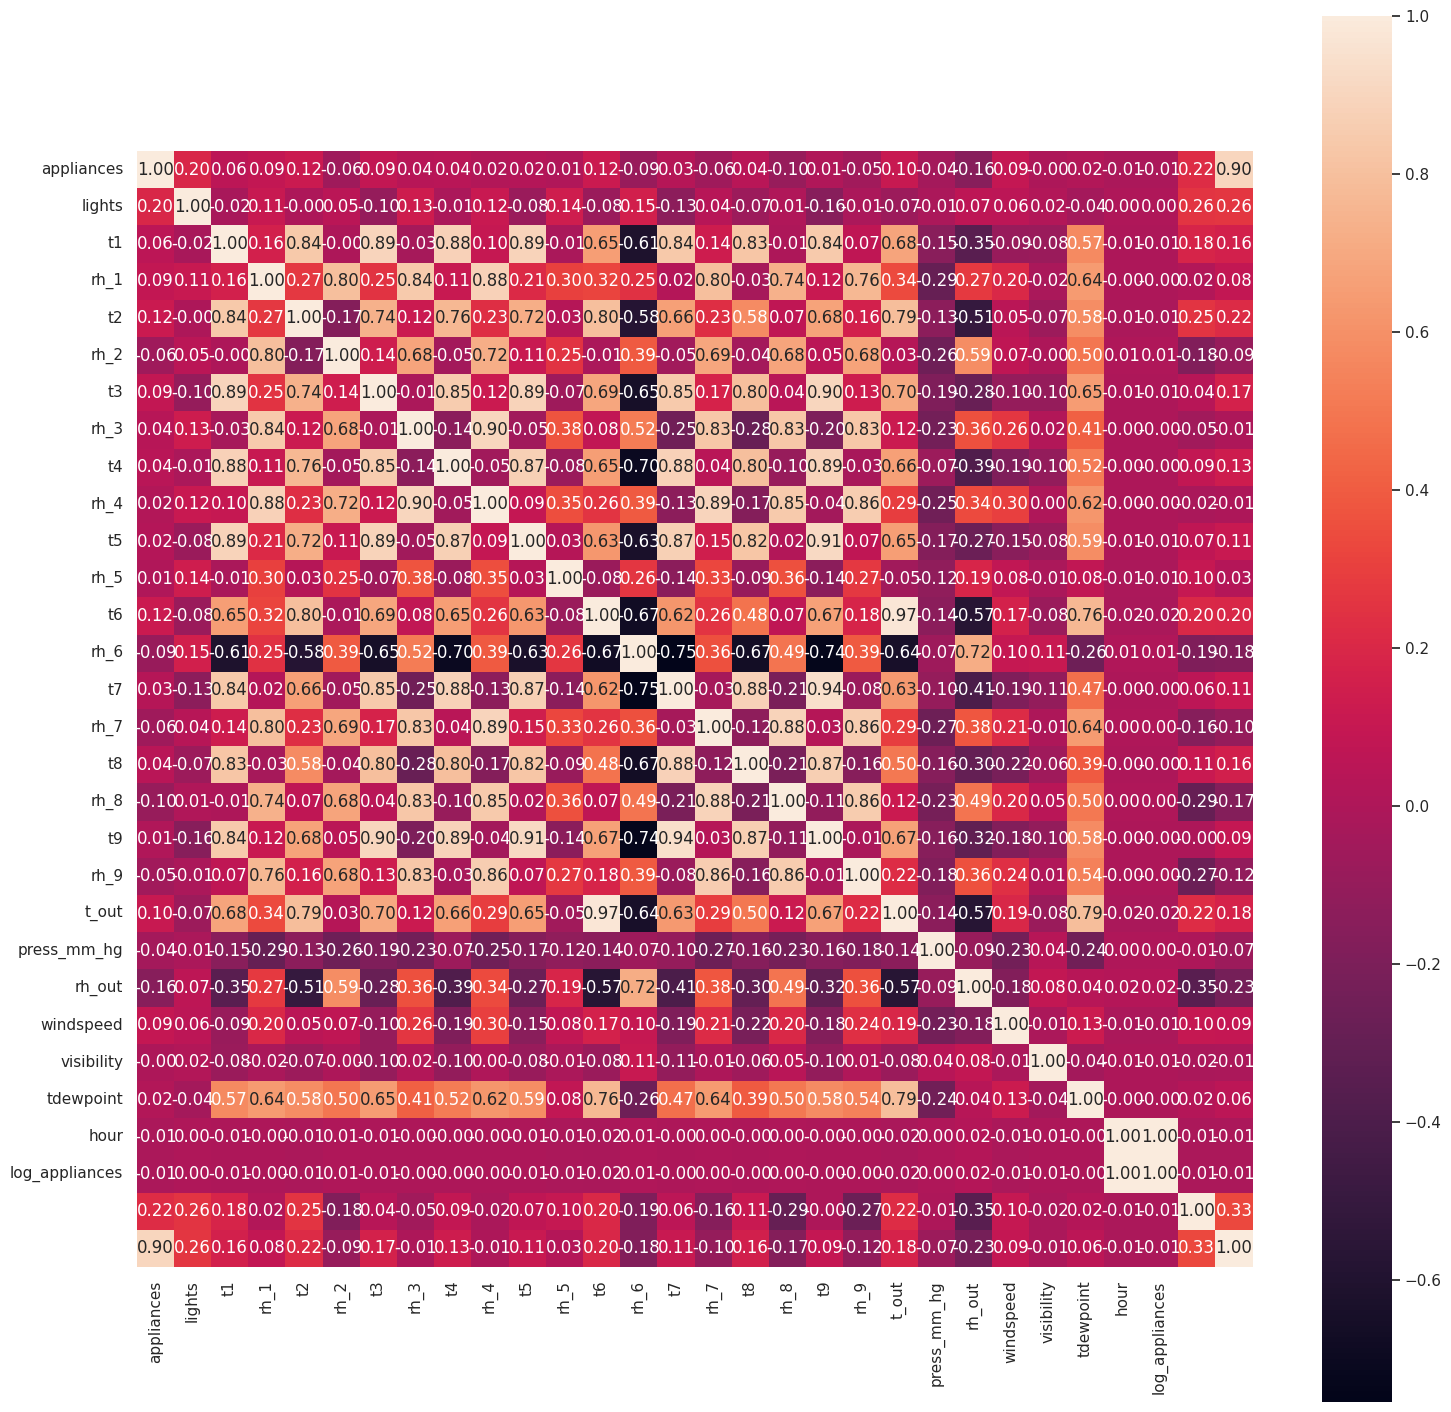

In [27]:
#Ploting correlation matrix
col = ['appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint','hour','log_appliances']
corr=energy_a.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

# **Splitting the Data**

In [28]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [29]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422035,755.561311,79.744066,4.057009,38.345054,3.768053,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.304241,7.398129,14.952250,2.449080,11.785900,4.189370,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933333,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.433333,760.966667,91.666667,5.500000,40.000000,6.566667,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.033333,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


# Re-Naming Coulmns 

In [30]:
# Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [31]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [32]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [33]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [34]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


# **Observations**


**Temperature columns** - The temperature within the house ranges from 14.89 to 29.85 degrees, whereas the outdoor temperature (T6) ranges from -6.06 to 28.29 degrees. This variation results from sensors being stored outside the home.


**Humidiy columns** - With the exception of RH 5 (bathroom) and RH 6 (outside home), where the humidity varies from 29.82% to 96.32% and 1% to 99.9%, respectively, within the house, the humidity ranges from 20.60% to 63.36%.

**Appliances** - The usage of 75% of appliances is less than 100 Wh. There will be outliers in this column and a limited number of instances where consumption is quite high due to the maximum usage of 1080 Wh.

**Lights column** - Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence for now , I will dropping this column

In [35]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

In [36]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.6,19.5,21.50,22.89,19.166667,2.863333,21.0,22.89,19.89,34.70,...,38.5,37.26,2.233333,0.4,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.7,21.0,25.39,23.60,19.890000,5.500000,23.0,24.20,22.60,40.29,...,43.4,44.59,6.266667,5.3,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677


# **Data Pre Processing**

In [37]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [38]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]


In [39]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

In [40]:
# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [41]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [42]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [43]:
# Scaling the dataset 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [44]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [45]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [46]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602


In [47]:
train_y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances, dtype: float64

# **Model Implementation**
We will be looking at following Algorithms

--

**Improved Linear regression models**

1. Ridge regression

2. Lasso regression


**Support Vector Machine**

3. Support vector regression


**Nearest neighbour Regressor**

4. KNeighborsRegressor


**Ensmble models**

5. Random Forest Regressor


**Neural Network**

6. Multi Layer Preceptron Regressor

In [69]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

# To store the results 
model_data = []

# Ridge regression

In [70]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

curr_model = Ridge() 
curr_model_data = {}
curr_model.random_state = 78
curr_model_data["Name"] = "Ridge Regression"
start = time.time()
curr_model.fit(train_X,train_y)
end = time.time()
curr_model_data["Train_Time"] = end - start
curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))

#Printing the results
print("Train Time: ",curr_model_data["Train_Time"])
print("Train R2 Score: ",curr_model_data["Train_R2_Score"])
print("Test R2 Score: ",curr_model_data["Test_R2_Score"])
print("Test RMSE Score: ",curr_model_data["Test_RMSE_Score"])

# Updating the Global result Array 
model_data.append(curr_model_data)

Train Time:  0.015767812728881836
Train R2 Score:  0.1375528613228285
Test R2 Score:  0.12139099895516814
Test RMSE Score:  0.937341453817568


# 2. Lasso Regression

In [71]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

curr_model = Lasso() 
curr_model_data = {}
curr_model.random_state = 78
curr_model_data["Name"] = "Lasso Regression" 
start = time.time()
curr_model.fit(train_X,train_y)
end = time.time()
curr_model_data["Train_Time"] = end - start
curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))

#Printing the results
print("Train Time: ",curr_model_data["Train_Time"])
print("Train R2 Score: ",curr_model_data["Train_R2_Score"])
print("Test R2 Score: ",curr_model_data["Test_R2_Score"])
print("Test RMSE Score: ",curr_model_data["Test_RMSE_Score"])

# Updating the Global result Array 
model_data.append(curr_model_data)

Train Time:  0.008117914199829102
Train R2 Score:  0.0
Test R2 Score:  0.0
Test RMSE Score:  1.0


# 3.Support vector regression

In [72]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

curr_model = SVR(kernel='rbf')
curr_model_data = {}
curr_model.random_state = 78
curr_model_data["Name"] = "Support Vector Regression" 
start = time.time()
curr_model.fit(train_X,train_y)
end = time.time()
curr_model_data["Train_Time"] = end - start
curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))

#Printing the results
print("Train Time: ",curr_model_data["Train_Time"])
print("Train R2 Score: ",curr_model_data["Train_R2_Score"])
print("Test R2 Score: ",curr_model_data["Test_R2_Score"])
print("Test RMSE Score: ",curr_model_data["Test_RMSE_Score"])

# Updating the Global result Array 
model_data.append(curr_model_data)

Train Time:  17.301141023635864
Train R2 Score:  0.23572363185689527
Test R2 Score:  0.2099338792025781
Test RMSE Score:  0.8888566368078836


# 4.KNeighborsRegressor

In [73]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

curr_model =  neighbors.KNeighborsRegressor()
curr_model_data = {}
curr_model.random_state = 78
curr_model_data["Name"] = "KNeighborsRegressor" 
start = time.time()
curr_model.fit(train_X,train_y)
end = time.time()
curr_model_data["Train_Time"] = end - start
curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))

#Printing the results
print("Train Time: ",curr_model_data["Train_Time"])
print("Train R2 Score: ",curr_model_data["Train_R2_Score"])
print("Test R2 Score: ",curr_model_data["Test_R2_Score"])
print("Test RMSE Score: ",curr_model_data["Test_RMSE_Score"])

# Updating the Global result Array 
model_data.append(curr_model_data)

Train Time:  0.005529880523681641
Train R2 Score:  0.6814651366245499
Test R2 Score:  0.4855598647200512
Test RMSE Score:  0.7172448224141802


# 5.RandomForest Regression

In [74]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

curr_model = RandomForestRegressor()
curr_model_data = {}
curr_model.random_state = 78
curr_model_data["Name"] = "RandomForest Regression" 
start = time.time()
curr_model.fit(train_X,train_y)
end = time.time()
curr_model_data["Train_Time"] = end - start
curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))

#Printing the results
print("Train Time: ",curr_model_data["Train_Time"])
print("Train R2 Score: ",curr_model_data["Train_R2_Score"])
print("Test R2 Score: ",curr_model_data["Test_R2_Score"])
print("Test RMSE Score: ",curr_model_data["Test_RMSE_Score"])

# Updating the Global result Array 
model_data.append(curr_model_data)

Train Time:  43.66344666481018
Train R2 Score:  0.9393264177690678
Test R2 Score:  0.5557145977210723
Test RMSE Score:  0.6665473743695399


# 6.Multi Layer Preceptron Regressor

In [75]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

curr_model =  MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)
curr_model_data = {}
curr_model.random_state = 78
curr_model_data["Name"] = "Multi Layer Preceptron Regressor" 
start = time.time()
curr_model.fit(train_X,train_y)
end = time.time()
curr_model_data["Train_Time"] = end - start
curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))

#Printing the results
print("Train Time: ",curr_model_data["Train_Time"])
print("Train R2 Score: ",curr_model_data["Train_R2_Score"])
print("Test R2 Score: ",curr_model_data["Test_R2_Score"])
print("Test RMSE Score: ",curr_model_data["Test_RMSE_Score"])

# Updating the Global result Array 
model_data.append(curr_model_data)


Train Time:  3.4236090183258057
Train R2 Score:  0.2985668922597653
Test R2 Score:  0.24317789368571174
Test RMSE Score:  0.8699552323621533


In [76]:
model_data

[{'Name': 'Ridge Regression',
  'Train_Time': 0.015767812728881836,
  'Train_R2_Score': 0.1375528613228285,
  'Test_R2_Score': 0.12139099895516814,
  'Test_RMSE_Score': 0.937341453817568},
 {'Name': 'Lasso Regression',
  'Train_Time': 0.008117914199829102,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Support Vector Regression',
  'Train_Time': 17.301141023635864,
  'Train_R2_Score': 0.23572363185689527,
  'Test_R2_Score': 0.2099338792025781,
  'Test_RMSE_Score': 0.8888566368078836},
 {'Name': 'KNeighborsRegressor',
  'Train_Time': 0.005529880523681641,
  'Train_R2_Score': 0.6814651366245499,
  'Test_R2_Score': 0.4855598647200512,
  'Test_RMSE_Score': 0.7172448224141802},
 {'Name': 'RandomForest Regression',
  'Train_Time': 43.66344666481018,
  'Train_R2_Score': 0.9393264177690678,
  'Test_R2_Score': 0.5557145977210723,
  'Test_RMSE_Score': 0.6665473743695399},
 {'Name': 'Multi Layer Preceptron Regressor',
  'Train_Time': 3.4236090183258057,
  '

In [77]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

#Printing the Dataframe
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Ridge Regression,0.015768,0.137553,0.121391,0.937341
1,Lasso Regression,0.008118,0.000000,0.000000,1.000000
2,Support Vector Regression,17.301141,0.235724,0.209934,0.888857
3,KNeighborsRegressor,0.005530,0.681465,0.485560,0.717245
4,RandomForest Regression,43.663447,0.939326,0.555715,0.666547
5,Multi Layer Preceptron Regressor,3.423609,0.298567,0.243178,0.869955


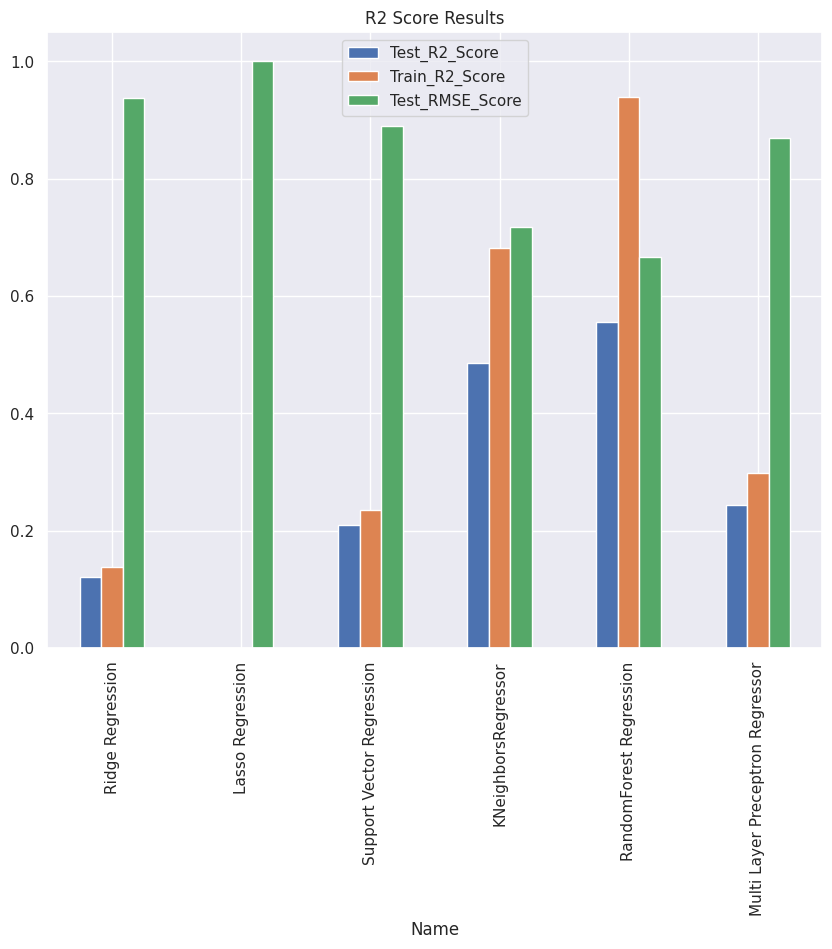

In [78]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

# **Hyper Parameter Tunning**

In [126]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

# To store the results 
model_tunned_data = []

# 1. Ridge Regression 

In [127]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge = Ridge(random_state=40)
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

curr_model_tunned_data = {}
curr_model_tunned_data["Name"] = "Ridge Regression Tunned"
start = time.time()

grid_search.fit(train_X, train_y)

end = time.time()
curr_model_tunned_data["Best_Hyper_Parameter"] = grid_search.best_params_
curr_model_tunned_data["Train_Time"] = end - start
curr_model_tunned_data["Train_R2_Score"] = grid_search.best_estimator_.score(train_X,train_y)
curr_model_tunned_data["Test_R2_Score"] = grid_search.best_estimator_.score(test_X,test_y)
curr_model_tunned_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

# Tuned parameter set
print("Best Tunned Parameter:",grid_search.best_params_)

# Best possible parameters 
print("Best Tunned Estimator:",grid_search.best_estimator_)

# R2 score on training set with tuned parameters
print("R2 Score for Tunned Parameter (Train):",grid_search.best_estimator_.score(train_X,train_y))

# R2 score on test set with tuned parameters
print("R2 Score for Tunned Parameter (Test):",grid_search.best_estimator_.score(test_X,test_y))

# RMSE score on test set with tuned parameters
print("RSME Score for Tunned Parameter (Test):" ,np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X))))

# Updating the Global result Array 
model_tunned_data.append(curr_model_tunned_data)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Tunned Parameter: {'alpha': 10.0, 'solver': 'saga'}
Best Tunned Estimator: Ridge(alpha=10.0, random_state=40, solver='saga')
R2 Score for Tunned Parameter (Train): 0.1375300443486409
R2 Score for Tunned Parameter (Test): 0.12155666538560983
RSME Score for Tunned Parameter (Test): 0.9372530792770916


In [128]:
model_tunned_data 

[{'Name': 'Ridge Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 10.0, 'solver': 'saga'},
  'Train_Time': 9.427045345306396,
  'Train_R2_Score': 0.1375300443486409,
  'Test_R2_Score': 0.12155666538560983,
  'Test_RMSE_Score': 0.9372530792770916}]

# 2.Lasso regression

In [129]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'selection': ['cyclic', 'random']
}

lasso = Lasso(random_state=40)
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

curr_model_tunned_data = {}
curr_model_tunned_data["Name"] = "Lasso Regression Tunned"
start = time.time()


grid_search.fit(train_X, train_y)


end = time.time()
curr_model_tunned_data["Best_Hyper_Parameter"] = grid_search.best_params_
curr_model_tunned_data["Train_Time"] = end - start
curr_model_tunned_data["Train_R2_Score"] = grid_search.best_estimator_.score(train_X,train_y)
curr_model_tunned_data["Test_R2_Score"] = grid_search.best_estimator_.score(test_X,test_y)
curr_model_tunned_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

# Tuned parameter set
print("Best Tunned Parameter:",grid_search.best_params_)

# Best possible parameters 
print("Best Tunned Estimator:",grid_search.best_estimator_)

# R2 score on training set with tuned parameters
print("R2 Score for Tunned Parameter (Train):",grid_search.best_estimator_.score(train_X,train_y))

# R2 score on test set with tuned parameters
print("R2 Score for Tunned Parameter (Test):",grid_search.best_estimator_.score(test_X,test_y))

# RMSE score on test set with tuned parameters
print("RSME Score for Tunned Parameter (Test):" ,np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X))))

# Updating the Global result Array 
model_tunned_data.append(curr_model_tunned_data)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Tunned Parameter: {'alpha': 0.01, 'selection': 'cyclic'}
Best Tunned Estimator: Lasso(alpha=0.01, random_state=40)
R2 Score for Tunned Parameter (Train): 0.12100652389511868
R2 Score for Tunned Parameter (Test): 0.11282651036531044
RSME Score for Tunned Parameter (Test): 0.941898874420545


In [130]:
model_tunned_data 

[{'Name': 'Ridge Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 10.0, 'solver': 'saga'},
  'Train_Time': 9.427045345306396,
  'Train_R2_Score': 0.1375300443486409,
  'Test_R2_Score': 0.12155666538560983,
  'Test_RMSE_Score': 0.9372530792770916},
 {'Name': 'Lasso Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 0.01, 'selection': 'cyclic'},
  'Train_Time': 0.8642408847808838,
  'Train_R2_Score': 0.12100652389511868,
  'Test_R2_Score': 0.11282651036531044,
  'Test_RMSE_Score': 0.941898874420545}]

# 3.Support vector regression

In [131]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
#'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'kernel': ['linear', 'poly'],
# 'C': [0.1, 1, 10, 100],
'epsilon': [0.01, 0.1, 1, 10]
}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

curr_model_tunned_data = {}
curr_model_tunned_data["Name"] = "SVR Regression Tunned"
start = time.time()

grid_search.fit(train_X, train_y)

end = time.time()
curr_model_tunned_data["Best_Hyper_Parameter"] = grid_search.best_params_
curr_model_tunned_data["Train_Time"] = end - start
curr_model_tunned_data["Train_R2_Score"] = grid_search.best_estimator_.score(train_X,train_y)
curr_model_tunned_data["Test_R2_Score"] = grid_search.best_estimator_.score(test_X,test_y)
curr_model_tunned_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

# Tuned parameter set
print("Best Tunned Parameter:",grid_search.best_params_)

# Best possible parameters 
print("Best Tunned Estimator:",grid_search.best_estimator_)

# R2 score on training set with tuned parameters
print("R2 Score for Tunned Parameter (Train):",grid_search.best_estimator_.score(train_X,train_y))

# R2 score on test set with tuned parameters
print("R2 Score for Tunned Parameter (Test):",grid_search.best_estimator_.score(test_X,test_y))

# RMSE score on test set with tuned parameters
print("RSME Score for Tunned Parameter (Test):" ,np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X))))

# Updating the Global result Array 
model_tunned_data.append(curr_model_tunned_data)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Tunned Parameter: {'epsilon': 0.1, 'kernel': 'poly'}
Best Tunned Estimator: SVR(kernel='poly')
R2 Score for Tunned Parameter (Train): 0.17302238132017855
R2 Score for Tunned Parameter (Test): 0.14976674467571027
RSME Score for Tunned Parameter (Test): 0.9220809375126946


In [132]:
model_tunned_data 

[{'Name': 'Ridge Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 10.0, 'solver': 'saga'},
  'Train_Time': 9.427045345306396,
  'Train_R2_Score': 0.1375300443486409,
  'Test_R2_Score': 0.12155666538560983,
  'Test_RMSE_Score': 0.9372530792770916},
 {'Name': 'Lasso Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 0.01, 'selection': 'cyclic'},
  'Train_Time': 0.8642408847808838,
  'Train_R2_Score': 0.12100652389511868,
  'Test_R2_Score': 0.11282651036531044,
  'Test_RMSE_Score': 0.941898874420545},
 {'Name': 'SVR Regression Tunned',
  'Best_Hyper_Parameter': {'epsilon': 0.1, 'kernel': 'poly'},
  'Train_Time': 531.5550489425659,
  'Train_R2_Score': 0.17302238132017855,
  'Test_R2_Score': 0.14976674467571027,
  'Test_RMSE_Score': 0.9220809375126946}]

# 4.KNeighborsRegressor

In [133]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_neighbors': [3, 5, 7, 9],
'weights': ['uniform', 'distance'],
'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

curr_model_tunned_data = {}
curr_model_tunned_data["Name"] = "KNeighbors Regressor Tunned"
start = time.time()

grid_search.fit(train_X, train_y)


end = time.time()
curr_model_tunned_data["Best_Hyper_Parameter"] = grid_search.best_params_
curr_model_tunned_data["Train_Time"] = end - start
curr_model_tunned_data["Train_R2_Score"] = grid_search.best_estimator_.score(train_X,train_y)
curr_model_tunned_data["Test_R2_Score"] = grid_search.best_estimator_.score(test_X,test_y)
curr_model_tunned_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))


# Tuned parameter set
print("Best Tunned Parameter:",grid_search.best_params_)

# Best possible parameters 
print("Best Tunned Estimator:",grid_search.best_estimator_)

# R2 score on training set with tuned parameters
print("R2 Score for Tunned Parameter (Train):",grid_search.best_estimator_.score(train_X,train_y))

# R2 score on test set with tuned parameters
print("R2 Score for Tunned Parameter (Test):",grid_search.best_estimator_.score(test_X,test_y))

# RMSE score on test set with tuned parameters
print("RSME Score for Tunned Parameter (Test):" ,np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X))))

# Updating the Global result Array 
model_tunned_data.append(curr_model_tunned_data)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Tunned Parameter: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best Tunned Estimator: KNeighborsRegressor(n_neighbors=3, weights='distance')
R2 Score for Tunned Parameter (Train): 0.9999999999999419
R2 Score for Tunned Parameter (Test): 0.5763731504618426
RSME Score for Tunned Parameter (Test): 0.6508662301411539


In [134]:
model_tunned_data 

[{'Name': 'Ridge Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 10.0, 'solver': 'saga'},
  'Train_Time': 9.427045345306396,
  'Train_R2_Score': 0.1375300443486409,
  'Test_R2_Score': 0.12155666538560983,
  'Test_RMSE_Score': 0.9372530792770916},
 {'Name': 'Lasso Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 0.01, 'selection': 'cyclic'},
  'Train_Time': 0.8642408847808838,
  'Train_R2_Score': 0.12100652389511868,
  'Test_R2_Score': 0.11282651036531044,
  'Test_RMSE_Score': 0.941898874420545},
 {'Name': 'SVR Regression Tunned',
  'Best_Hyper_Parameter': {'epsilon': 0.1, 'kernel': 'poly'},
  'Train_Time': 531.5550489425659,
  'Train_R2_Score': 0.17302238132017855,
  'Test_R2_Score': 0.14976674467571027,
  'Test_RMSE_Score': 0.9220809375126946},
 {'Name': 'KNeighbors Regressor Tunned',
  'Best_Hyper_Parameter': {'algorithm': 'auto',
   'n_neighbors': 3,
   'weights': 'distance'},
  'Train_Time': 52.204545736312866,
  'Train_R2_Score': 0.9999999999999419,
  'Test_R2_Score

# 5.Random Forest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_estimators': [50, 100, 200],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth': [None, 5, 10, 20]
# 'min_samples_split': [2, 5, 10],
# 'min_samples_leaf': [1, 2, 4],
# 'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=40)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

curr_model_tunned_data = {}
curr_model_tunned_data["Name"] = "Random Forset Regression Tunned"
start = time.time()

grid_search.fit(train_X, train_y)

end = time.time()
curr_model_tunned_data["Best_Hyper_Parameter"] = grid_search.best_params_
curr_model_tunned_data["Train_Time"] = end - start
curr_model_tunned_data["Train_R2_Score"] = grid_search.best_estimator_.score(train_X,train_y)
curr_model_tunned_data["Test_R2_Score"] = grid_search.best_estimator_.score(test_X,test_y)
curr_model_tunned_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))


# Tuned parameter set
print("Best Tunned Parameter:",grid_search.best_params_)

# Best possible parameters 
print("Best Tunned Estimator:",grid_search.best_estimator_)

# R2 score on training set with tuned parameters
print("R2 Score for Tunned Parameter (Train):",grid_search.best_estimator_.score(train_X,train_y))

# R2 score on test set with tuned parameters
print("R2 Score for Tunned Parameter (Test):",grid_search.best_estimator_.score(test_X,test_y))

# RMSE score on test set with tuned parameters
print("RSME Score for Tunned Parameter (Test):" ,np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X))))


# Updating the Global result Array 
model_tunned_data.append(curr_model_tunned_data)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Tunned Parameter: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best Tunned Estimator: RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=40)
R2 Score for Tunned Parameter (Train): 0.9433790065100397
R2 Score for Tunned Parameter (Test): 0.5700732924097576
RSME Score for Tunned Parameter (Test): 0.6556879651101142


In [138]:
model_tunned_data 

[{'Name': 'Ridge Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 10.0, 'solver': 'saga'},
  'Train_Time': 9.427045345306396,
  'Train_R2_Score': 0.1375300443486409,
  'Test_R2_Score': 0.12155666538560983,
  'Test_RMSE_Score': 0.9372530792770916},
 {'Name': 'Lasso Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 0.01, 'selection': 'cyclic'},
  'Train_Time': 0.8642408847808838,
  'Train_R2_Score': 0.12100652389511868,
  'Test_R2_Score': 0.11282651036531044,
  'Test_RMSE_Score': 0.941898874420545},
 {'Name': 'SVR Regression Tunned',
  'Best_Hyper_Parameter': {'epsilon': 0.1, 'kernel': 'poly'},
  'Train_Time': 531.5550489425659,
  'Train_R2_Score': 0.17302238132017855,
  'Test_R2_Score': 0.14976674467571027,
  'Test_RMSE_Score': 0.9220809375126946},
 {'Name': 'KNeighbors Regressor Tunned',
  'Best_Hyper_Parameter': {'algorithm': 'auto',
   'n_neighbors': 3,
   'weights': 'distance'},
  'Train_Time': 52.204545736312866,
  'Train_R2_Score': 0.9999999999999419,
  'Test_R2_Score

# 6.Multi Layer Preceptron Regressor

In [139]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
# 'activation': ['identity', 'logistic', 'tanh', 'relu'],
'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
# 'solver': ['lbfgs', 'adam'],
'learning_rate': ['constant'],
#'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

mlp = MLPRegressor(random_state=40)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

curr_model_tunned_data = {}
curr_model_tunned_data["Name"] = "MLP Regression Tunned"
start = time.time()

grid_search.fit(train_X, train_y)


end = time.time()
curr_model_tunned_data["Best_Hyper_Parameter"] = grid_search.best_params_
curr_model_tunned_data["Train_Time"] = end - start
curr_model_tunned_data["Train_R2_Score"] = grid_search.best_estimator_.score(train_X,train_y)
curr_model_tunned_data["Test_R2_Score"] = grid_search.best_estimator_.score(test_X,test_y)
curr_model_tunned_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))


# Tuned parameter set
print("Best Tunned Parameter:",grid_search.best_params_)

# Best possible parameters 
print("Best Tunned Estimator:",grid_search.best_estimator_)

# R2 score on training set with tuned parameters
print("R2 Score for Tunned Parameter (Train):",grid_search.best_estimator_.score(train_X,train_y))

# R2 score on test set with tuned parameters
print("R2 Score for Tunned Parameter (Test):",grid_search.best_estimator_.score(test_X,test_y))

# RMSE score on test set with tuned parameters
print("RSME Score for Tunned Parameter (Test):" ,np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X))))


# Updating the Global result Array 
model_tunned_data.append(curr_model_tunned_data)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Tunned Parameter: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant'}
Best Tunned Estimator: MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100), random_state=40)
R2 Score for Tunned Parameter (Train): 0.509095219663477
R2 Score for Tunned Parameter (Test): 0.3823656571087092
RSME Score for Tunned Parameter (Test): 0.7858971579610724


In [140]:
model_tunned_data 

[{'Name': 'Ridge Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 10.0, 'solver': 'saga'},
  'Train_Time': 9.427045345306396,
  'Train_R2_Score': 0.1375300443486409,
  'Test_R2_Score': 0.12155666538560983,
  'Test_RMSE_Score': 0.9372530792770916},
 {'Name': 'Lasso Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 0.01, 'selection': 'cyclic'},
  'Train_Time': 0.8642408847808838,
  'Train_R2_Score': 0.12100652389511868,
  'Test_R2_Score': 0.11282651036531044,
  'Test_RMSE_Score': 0.941898874420545},
 {'Name': 'SVR Regression Tunned',
  'Best_Hyper_Parameter': {'epsilon': 0.1, 'kernel': 'poly'},
  'Train_Time': 531.5550489425659,
  'Train_R2_Score': 0.17302238132017855,
  'Test_R2_Score': 0.14976674467571027,
  'Test_RMSE_Score': 0.9220809375126946},
 {'Name': 'KNeighbors Regressor Tunned',
  'Best_Hyper_Parameter': {'algorithm': 'auto',
   'n_neighbors': 3,
   'weights': 'distance'},
  'Train_Time': 52.204545736312866,
  'Train_R2_Score': 0.9999999999999419,
  'Test_R2_Score

# Comparing Results

In [141]:
model_tunned_data 

[{'Name': 'Ridge Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 10.0, 'solver': 'saga'},
  'Train_Time': 9.427045345306396,
  'Train_R2_Score': 0.1375300443486409,
  'Test_R2_Score': 0.12155666538560983,
  'Test_RMSE_Score': 0.9372530792770916},
 {'Name': 'Lasso Regression Tunned',
  'Best_Hyper_Parameter': {'alpha': 0.01, 'selection': 'cyclic'},
  'Train_Time': 0.8642408847808838,
  'Train_R2_Score': 0.12100652389511868,
  'Test_R2_Score': 0.11282651036531044,
  'Test_RMSE_Score': 0.941898874420545},
 {'Name': 'SVR Regression Tunned',
  'Best_Hyper_Parameter': {'epsilon': 0.1, 'kernel': 'poly'},
  'Train_Time': 531.5550489425659,
  'Train_R2_Score': 0.17302238132017855,
  'Test_R2_Score': 0.14976674467571027,
  'Test_RMSE_Score': 0.9220809375126946},
 {'Name': 'KNeighbors Regressor Tunned',
  'Best_Hyper_Parameter': {'algorithm': 'auto',
   'n_neighbors': 3,
   'weights': 'distance'},
  'Train_Time': 52.204545736312866,
  'Train_R2_Score': 0.9999999999999419,
  'Test_R2_Score

In [146]:
# Convert list to dataframe
df1 = pd.DataFrame(model_tunned_data)
df1

,Name,Best_Hyper_Parameter,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Ridge Regression Tunned,"{'alpha': 10.0, 'solver': 'saga'}",9.427045,0.137530,0.121557,0.937253
1,Lasso Regression Tunned,"{'alpha': 0.01, 'selection': 'cyclic'}",0.864241,0.121007,0.112827,0.941899
2,SVR Regression Tunned,"{'epsilon': 0.1, 'kernel': 'poly'}",531.555049,0.173022,0.149767,0.922081
3,KNeighbors Regressor Tunned,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",52.204546,1.000000,0.576373,0.650866
4,Random Forset Regression Tunned,"{'max_depth': None, 'max_features': 'sqrt', 'n...",1364.861775,0.943379,0.570073,0.655688
5,MLP Regression Tunned,"{'alpha': 0.01, 'hidden_layer_sizes': (100, 10...",1065.094116,0.509095,0.382366,0.785897


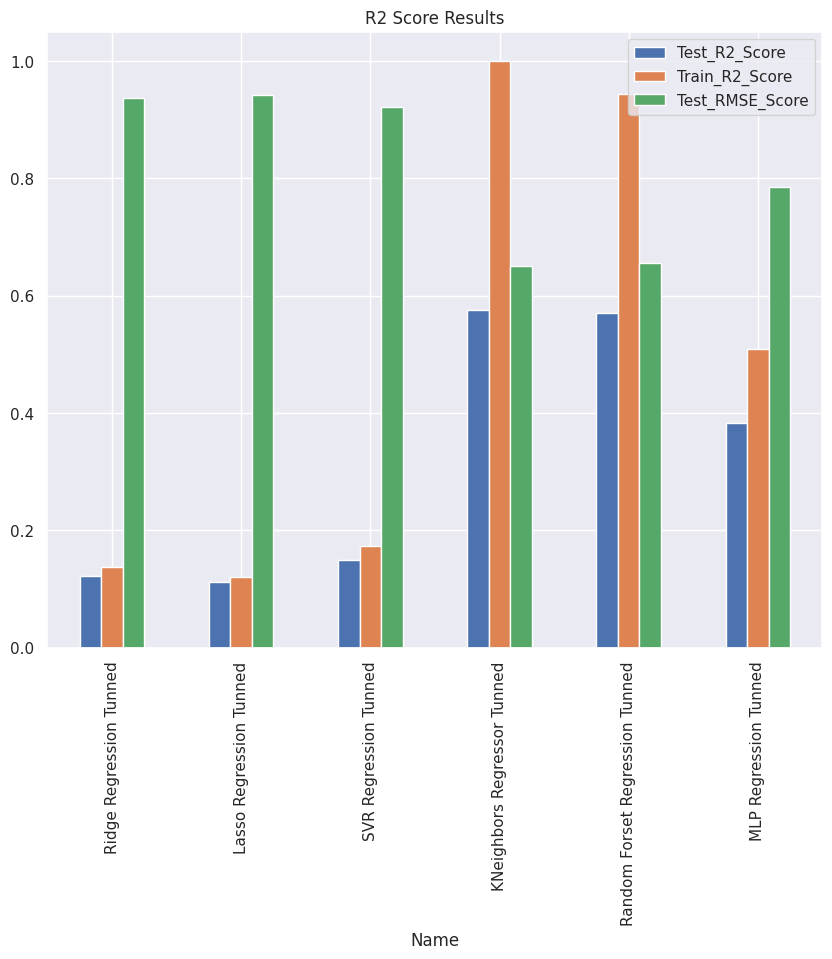

In [147]:
df1.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;